<a href="https://colab.research.google.com/github/Faizanealiqazi/TSP_CUCKOO_SEARCH/blob/main/NIIA_PROJECT_EFFECTS_OF_POPULATION_ON_CUCKOO_SEARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm
from scipy.special import gamma
from numpy.polynomial.chebyshev import Chebyshev
from scipy.linalg import hilbert
import time

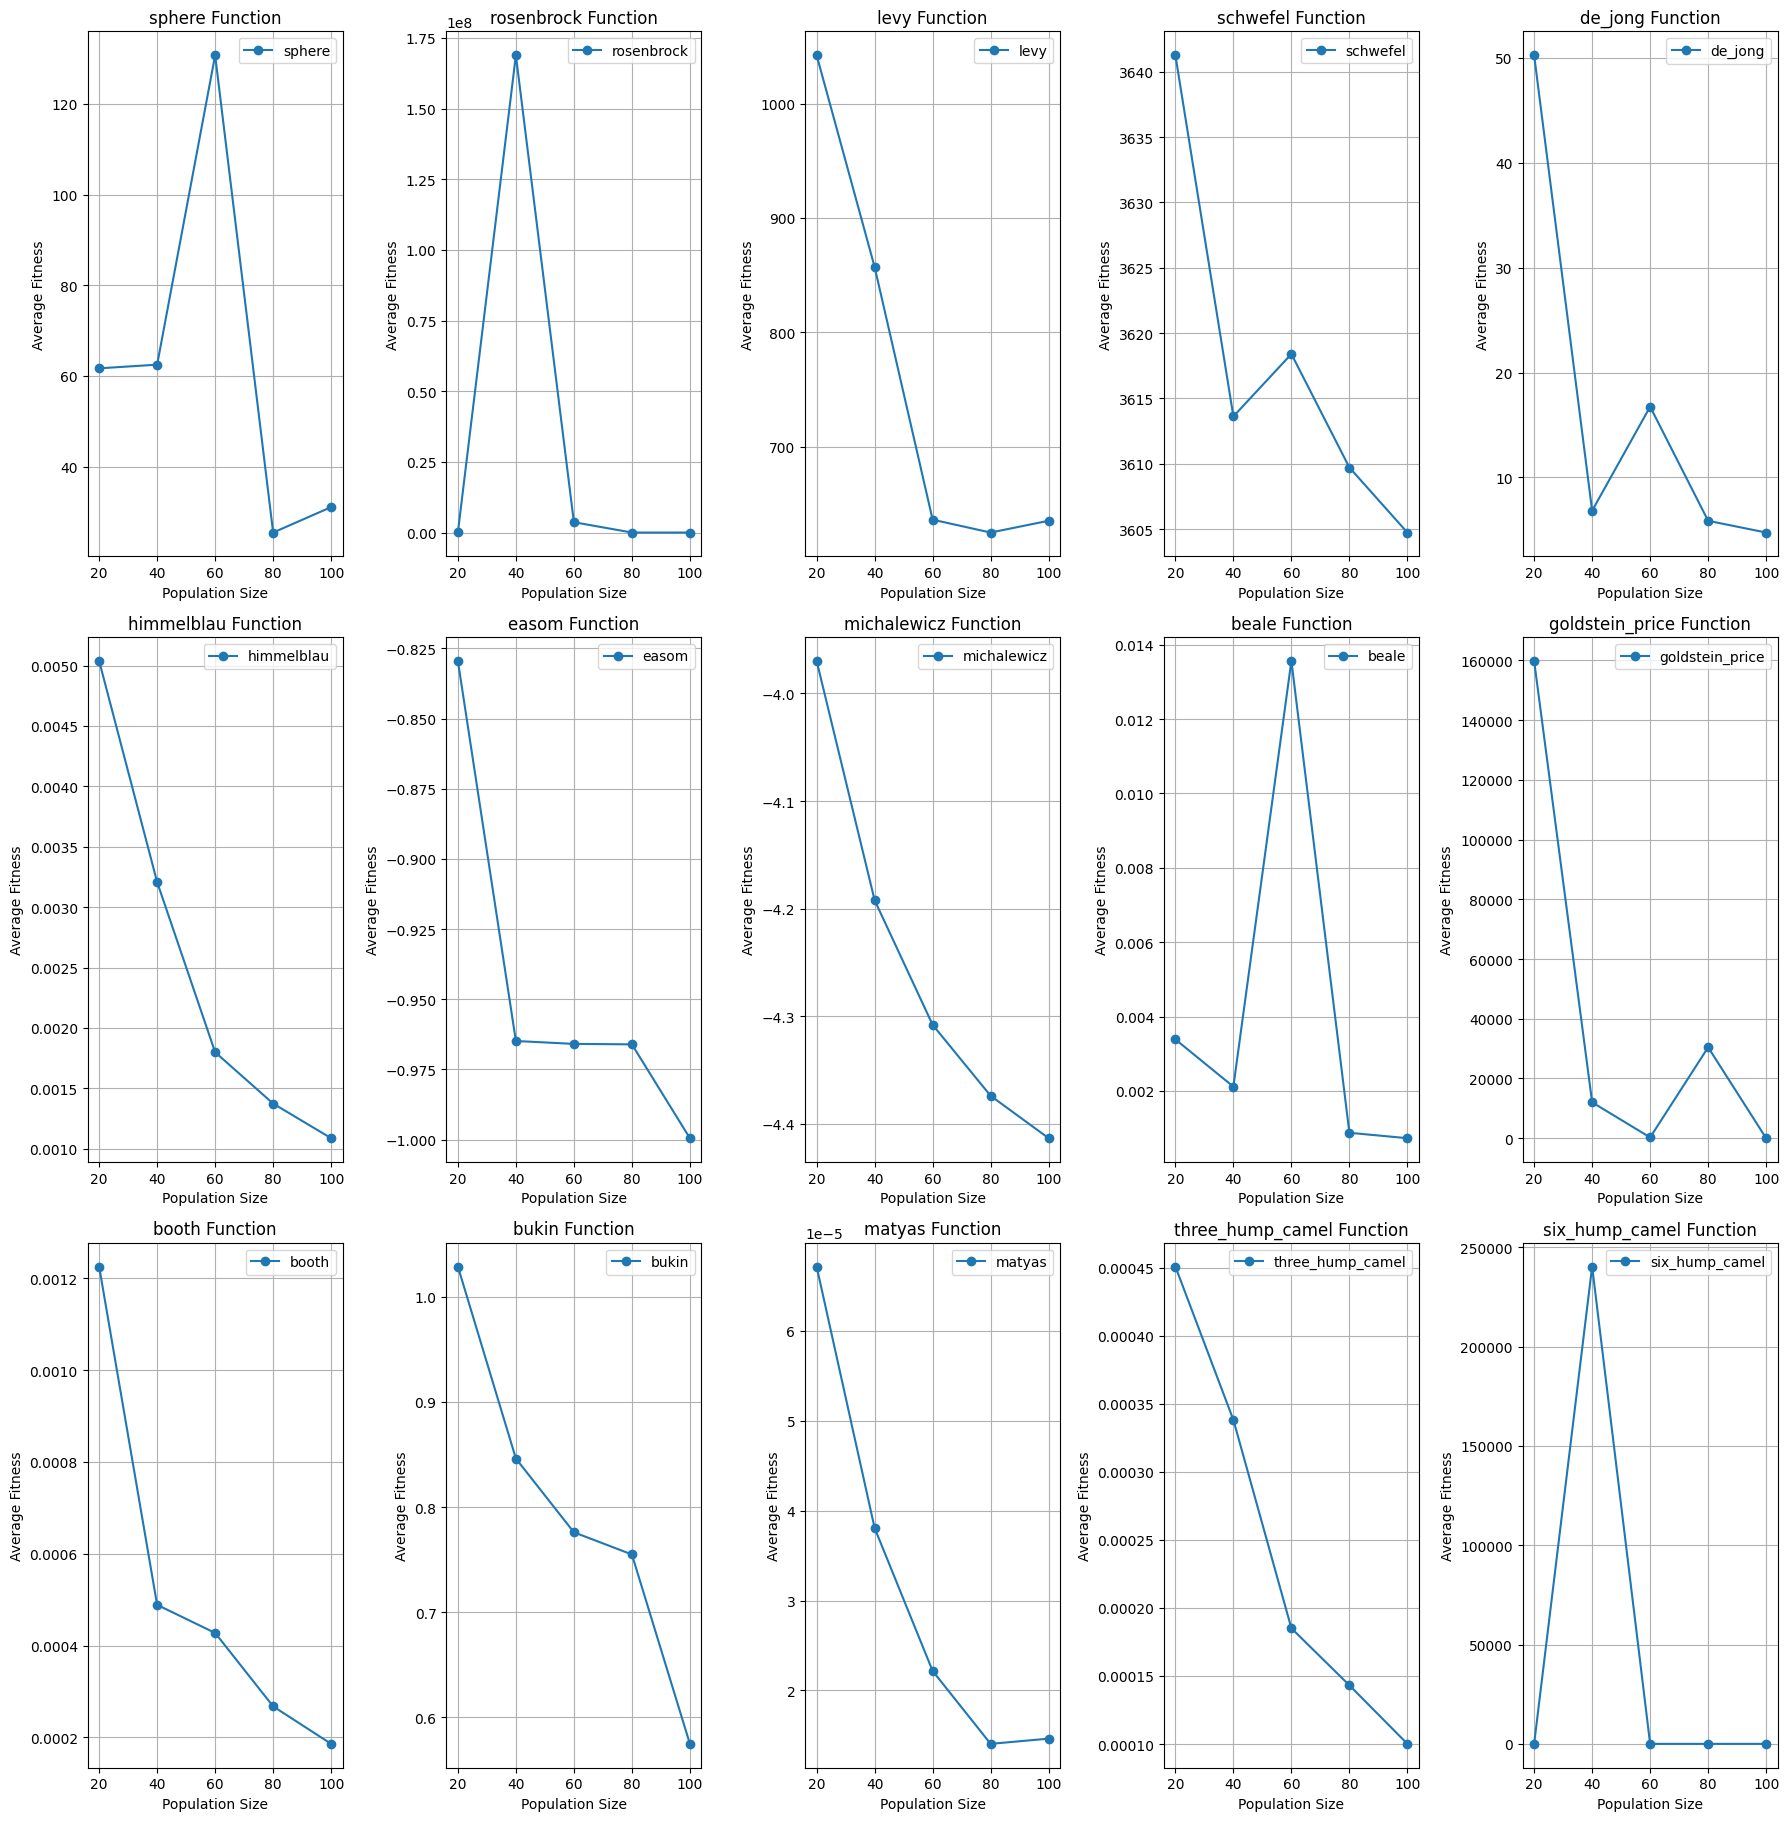

In [17]:


benchmark_results = {
    'sphere': [61.66894929313386, 62.47563943771281, 130.7140745261748, 25.455702272358753, 31.06506800157641],
    'rosenbrock': [46703.28193255502, 168892200.08583593, 3662622.244629677, 3722.233268581769, 2001.4750197770456],
    'levy': [1042.2087004596547, 857.1666922030502, 636.415690299986, 625.1579126323943, 635.4652968201865],
    'schwefel': [3641.270477291915, 3613.622000298977, 3618.401872636773, 3609.713048464508, 3604.7347443664667],
    'de_jong': [50.26384403101351, 6.82611813722329, 16.74547292562592, 5.862543668452976, 4.743142111994861],
    'himmelblau': [0.005038859460831752, 0.0032076364989569667, 0.0017989697351703617, 0.0013736868996429006, 0.0010870881118319484],
    'easom': [-0.82946232704165, -0.9648594730059792, -0.9658900143753405, -0.9660521779548261, -0.9994825836804968],
    'michalewicz': [-3.9697346874862074, -4.192137171806292, -4.307922738706865, -4.373865378838484, -4.413248322649128],
    'beale': [0.0033883549079661316, 0.0021171091982040953, 0.01356426281787417, 0.0008773992572601245, 0.0007317497259524363],
    'goldstein_price': [159858.08657961132, 12016.012004042108, 265.7776224422722, 30438.45570748818, 3.197122793896583],
    'booth': [0.0012258488697342806, 0.0004886346473636497, 0.00042738771053914596, 0.00026739841714460463, 0.00018570036462875507],
    'bukin': [1.028697760234354, 0.8461365471904422, 0.7760190953234415, 0.7549647335703831, 0.5748576313955358],
    'matyas': [6.715374577818537e-05, 3.8064766517848584e-05, 2.2168376630358857e-05, 1.4059176218889384e-05, 1.4638681786427681e-05],
    'three_hump_camel': [0.0004507692005439419, 0.0003381220531108855, 0.00018505940917428363, 0.0001431649894008828, 0.00010014781436860066],
    'six_hump_camel': [-1.0300946550575787, 240278.34625626536, -1.0311728608523558, -1.0314102000441467, -1.0314207854049051]
}

plt.figure(figsize=(18, 30))

for i, (func_name, fitness_values) in enumerate(benchmark_results.items(), start=1):
    plt.subplot(5, 5, i)
    population_sizes = [20, 40, 60, 80, 100]
    plt.plot(population_sizes,fitness_values, label=func_name, marker='o')
    plt.title(f'{func_name} Function')
    plt.xlabel('Population Size')
    plt.ylabel('Average Fitness')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


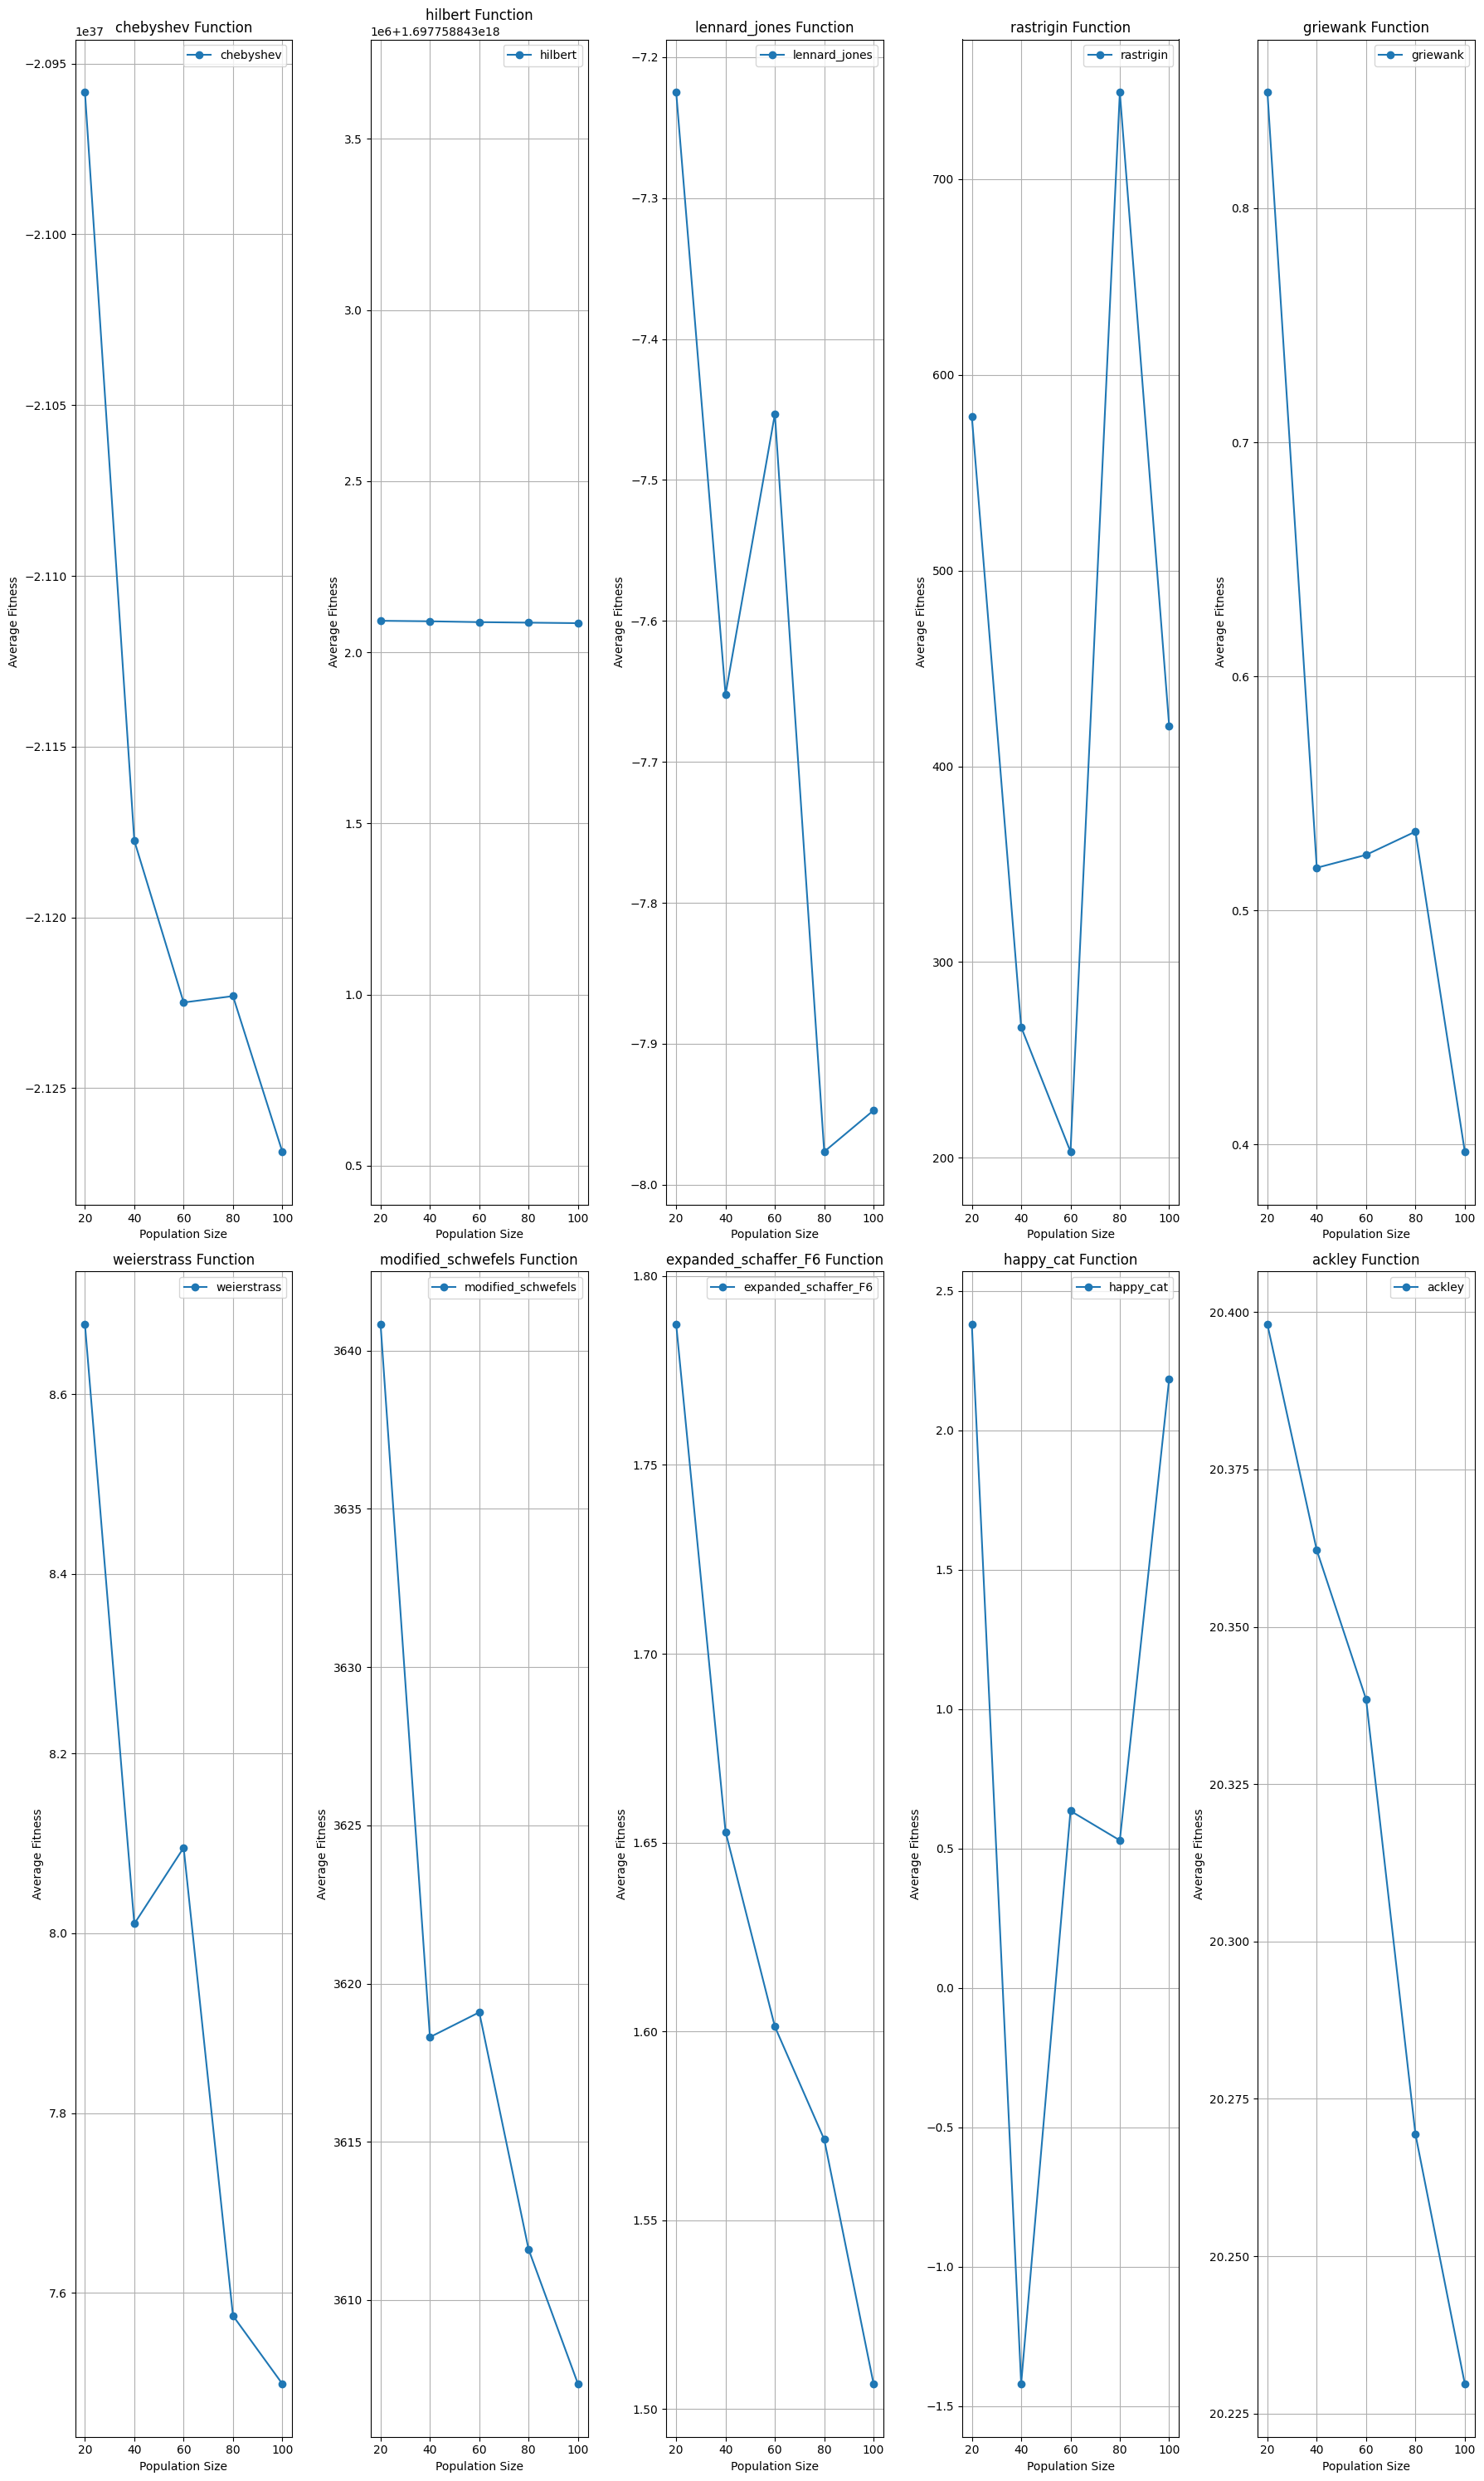

In [18]:
cec2019_benchmark_results = {
    'chebyshev': [-2.0958417063907387e+37, -2.1177507333918449e+37, -2.1224892600360633e+37, -2.1223024939511456e+37, -2.1268582976318734e+37],
    'hilbert': [1.697758843012092e+18, 1.6977588430120904e+18, 1.697758843012088e+18, 1.6977588430120865e+18, 1.697758843012085e+18],
    'lennard_jones': [-7.224944624261902, -7.652215620142044, -7.453138898161835, -7.976608724078405, -7.947287411769755],
    'rastrigin': [578.7980986841278, 266.78641672776297, 203.0992428982953, 744.3318771872972, 420.61030518458404],
    'griewank': [0.8494664215902923, 0.5182332603601304, 0.5237569907858076, 0.533695223710983, 0.3969527690016986],
    'weierstrass': [8.677767422759405, 8.010620796550349, 8.095341401388925, 7.574281074816394, 7.498513694580409],
    'modified_schwefels': [3640.8234499253936, 3618.3072718395442, 3619.0922010720146, 3611.6014532257755, 3607.353566743089],
    'expanded_schaffer_F6': [1.7871629131512352, 1.652865007227088, 1.6012652433310977, 1.5714146871156547, 1.5066961030156707],
    'happy_cat': [2.378951454974312, -1.4204765342431287, 0.6344574259917964, 0.5287816848998571, 2.184088754357132],
    'ackley': [20.39803309163739, 20.362170572557623, 20.338486855834233, 20.269369046028444, 20.229717400601935]
}
plt.figure(figsize=(18, 30))

for i, (func_name, fitness_values) in enumerate(cec2019_benchmark_results.items(), start=1):
    plt.subplot(2, 5, i)
    population_sizes = [20, 40, 60, 80, 100]
    plt.plot(population_sizes,fitness_values, label=func_name, marker='o')
    plt.title(f'{func_name} Function')
    plt.xlabel('Population Size')
    plt.ylabel('Average Fitness')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
"""
Possible Lévy distribution
Mantegna's Algorithm // Currently applied
Inverse Transform Sampling
Chambers-Mallows-Stuck Method (CMS)
Series Expansion
Monte Carlo Simulation
Fourier Transform Sampling
Rejection Sampling
"""

"\nPossible Lévy distribution\nMantegna's Algorithm // Currently applied\nInverse Transform Sampling\nChambers-Mallows-Stuck Method (CMS)\nSeries Expansion\nMonte Carlo Simulation\nFourier Transform Sampling\nRejection Sampling\n"

In [3]:
"""
Initialize population with random tours
Evaluate the fitness of each tour

for each generation do
    Generate a new tour by Lévy flight from an existing tour
    Evaluate its fitness
    Choose a random nest (tour) from the population
    if the fitness of the new tour is better than the chosen nest then
        Replace the chosen nest with the new tour
    end if
    Abandon a fraction pa of the worst nests and generate new ones
    Keep the best tour found so far
end for

Return the best tour
"""

'\nInitialize population with random tours\nEvaluate the fitness of each tour\n\nfor each generation do\n    Generate a new tour by Lévy flight from an existing tour\n    Evaluate its fitness\n    Choose a random nest (tour) from the population\n    if the fitness of the new tour is better than the chosen nest then\n        Replace the chosen nest with the new tour\n    end if\n    Abandon a fraction pa of the worst nests and generate new ones\n    Keep the best tour found so far\nend for\n\nReturn the best tour\n'

In [ ]:
# 1 Sphere Function
def sphere(x):
    return sum([xi**2 for xi in x])

# 2 Rastrigin Function cec2019
def rastrigin(x, dimension=10):
    x_clipped = np.clip(x, -100, 100)
    return 10 * dimension + sum([(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x_clipped])

# 3 Ackley Function cec2019
def ackley(x, a=20, b=0.2, c=2*np.pi):
    x_clipped = np.clip(x, -100, 100)
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum(xi**2 for xi in x_clipped) / len(x_clipped)))
    cos_term = -np.exp(sum(np.cos(c * xi) for xi in x_clipped) / len(x_clipped))
    return a + np.exp(1) + sum_sq_term + cos_term


# 4 Rosenbrock Function
def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2 for i in range(len(x)-1)])

# 5 Griewank Function cec2019
def griewank(x, dimension=10):
    x_clipped = np.clip(x, -100, 100)
    part1 = sum([xi**2 / 4000 for xi in x_clipped])
    part2 = np.prod([np.cos(xi / np.sqrt(i+1)) for i, xi in enumerate(x_clipped)])
    return 1 + part1 - part2

# 6 Levy Function
def levy(x):
    w = 1 + (np.array(x) - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    sum_terms = sum([(wi - 1)**2 * (1 + 10 * np.sin(np.pi * wi + 1)**2) for wi in w[:-1]])
    return term1 + sum_terms + term3

# 7 Schwefel Function
def schwefel(x):
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

# 8 De Jong's Function
def de_jong(x):
    return sum([xi**2 for xi in x])

# 9 Himmelblau's Function
def himmelblau(x):
    x, y = x[0], x[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# 10 Easom Function
def easom(x):
    x, y = x[0], x[1]
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

# 11 Michalewicz Function
def michalewicz(x, m=10):
    return -sum([np.sin(xi) * np.sin((i + 1) * xi**2 / np.pi)**(2 * m) for i, xi in enumerate(x)])

# 12 Beale's Function
def beale(x):
    x1, x2 = x[0], x[1]
    return (1.5 - x1 + x1 * x2)**2 + (2.25 - x1 + x1 * x2**2)**2 + (2.625 - x1 + x1 * x2**3)**2

# 13 Goldstein-Price Function
def goldstein_price(x):
    x1, x2 = x[0], x[1]
    return (1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2)) * \
           (30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2))

# 14 Booth's Function
def booth(x):
    x1, x2 = x[0], x[1]
    return (x1 + 2 * x2 - 7)**2 + (2 * x1 + x2 - 5)**2

# 15 Bukin Function N.6
def bukin(x):
    x1, x2 = x[0], x[1]
    return 100 * np.sqrt(abs(x2 - 0.01 * x1**2)) + 0.01 * abs(x1 + 10)

# 16 Matyas Function
def matyas(x):
    x1, x2 = x[0], x[1]
    return 0.26 * (x1**2 + x2**2) - 0.48 * x1 * x2

# 17 Three-hump Camel Function
def three_hump_camel(x):
    x1, x2 = x[0], x[1]
    return 2 * x1**2 - 1.05 * x1**4 + (x1**6 / 6) + x1 * x2 + x2**2

# 18 Six-hump Camel Function
def six_hump_camel(x):
    x1, x2 = x[0], x[1]
    return (4 - 2.1 * x1**2 + (x1**4 / 3)) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

# 19 Cross-in-Tray Function
def cross_in_tray(x):
    try:
        x1, x2 = x[0], x[1]
        term = np.abs(100 - np.sqrt(x1**2 + x2**2) / np.pi)
        return -0.0001 * (np.abs(np.sin(x1) * np.sin(x2) * np.exp(term)) + 1)**0.1
    except FloatingPointError:
        return np.inf

# 20 Eggholder Function
def eggholder(x):
    x1, x2 = x[0], x[1]
    return -(x2 + 47) * np.sin(np.sqrt(abs(x2 + x1 / 2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

In [ ]:
def chebyshev_fitness(coeffs, degree=8, domain=[-8192, 8192], num_points=1000):
    x_target = np.linspace(domain[0], domain[1], num_points)
    y_target = np.cos(degree * np.arccos(np.clip(x_target / domain[1], -1, 1)))

    t = Chebyshev(coeffs, domain=[-1, 1])
    y_eval = t(x_target)

    fitness = -np.max(np.abs(y_eval - y_target))
    return fitness


def inverse_hilbert_matrix_fitness(vec, dimension):
    candidate_matrix = vec.reshape((dimension, dimension))
    true_inv_hilbert_matrix = np.linalg.inv(hilbert(dimension))
    diff = true_inv_hilbert_matrix - candidate_matrix
    return np.linalg.norm(diff, 'fro')

# Lennard-Jones potential energy function for a cluster of atoms
def lennard_jones_potential(positions, epsilon=1.0, sigma=1.0):
    total_energy = 0.0
    N = positions.size // 3
    coords = positions.reshape((N, 3))

    for i in range(N - 1):
        for j in range(i + 1, N):
            r_ij = np.linalg.norm(coords[i] - coords[j])
            if r_ij == 0:
                continue
            lj = 4 * epsilon * ((sigma / r_ij)**12 - (sigma / r_ij)**6)
            total_energy += lj

    return total_energy


def lennard_jones_fitness(vec):
    fitness = lennard_jones_potential(vec)
    return fitness

# Weierstrass function
def weierstrass(x, a=0.5, b=3, k_max=20):
    x_clipped = np.clip(x, -100, 100)
    dimension = len(x_clipped)
    ak = a ** np.arange(k_max + 1)
    bk = b ** np.arange(k_max + 1)
    f = 0.0
    for i in range(dimension):
        xi = x_clipped[i]
        f += sum(ak * np.cos(2 * np.pi * bk * (xi + 0.5)))
    f -= dimension * sum(ak * np.cos(2 * np.pi * bk * 0.5))
    return f

# Modified Schwefel's function
def modified_schwefels(x, dimension=10):
    x_clipped = np.clip(x, -100, 100)
    schwefel_sum = np.sum(x_clipped * np.sin(np.sqrt(np.abs(x_clipped))))
    f_x = 418.9829 * dimension - schwefel_sum
    return f_x

# Schaffer's F6 function for a pair of input variables
def schaffer_F6_pair(x1, x2):
    numerator = np.sin(np.sqrt(x1**2 + x2**2))**2 - 0.5
    denominator = (1.0 + 0.001 * (x1**2 + x2**2))**2
    return 0.5 + numerator / denominator

# Expanded Schaffer's F6 function for a vector of input variables
def expanded_schaffer_F6(x):
    x_clipped = np.clip(x, -100, 100)
    f_x = np.sum([schaffer_F6_pair(x_clipped[i], x_clipped[i + 1]) for i in range(0, len(x_clipped) - 1, 2)])
    return f_x

# Happy Cat function
def happy_cat(x, alpha=0.5):
    x_clipped = np.clip(x, -100, 100)
    n = len(x_clipped)
    x_norm = np.linalg.norm(x_clipped)
    return ((x_norm - n)**2)**alpha + (0.5*x_norm + sum(x_clipped))/(n+0.5) + 0.5


In [ ]:
benchmark_functions = {
    "sphere": sphere,
    "rastrigin": rastrigin,
    "ackley": ackley,
    "rosenbrock": rosenbrock,
    "griewank": griewank,
    "levy": levy,
    "schwefel": schwefel,
    "de_jong": de_jong,
    "himmelblau": himmelblau,
    "easom": easom,
    "michalewicz": michalewicz,
    "beale": beale,
    "goldstein_price": goldstein_price,
    "booth": booth,
    "bukin": bukin,
    "matyas": matyas,
    "three_hump_camel": three_hump_camel,
    "six_hump_camel": six_hump_camel,
    "eggholder": eggholder,
    "chebyshev": chebyshev_fitness,
    "hilbert": inverse_hilbert_matrix_fitness,
    'lennard_jones': lennard_jones_fitness,
    'weierstrass': weierstrass,
    'modified_schwefels': modified_schwefels,
    'expanded_schaffer_F6': expanded_schaffer_F6,
    'happy_cat': happy_cat
}

In [ ]:
function_specs = {
    'sphere': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'rosenbrock': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'levy': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'schwefel': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'de_jong': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'himmelblau': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'easom': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'michalewicz': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'beale': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'goldstein_price': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'booth': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'bukin': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'matyas': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'three_hump_camel': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'six_hump_camel': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'eggholder': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'chebyshev': {'dimensions': 9, 'special': None, 'search_range': (-8192, 8192)},
    'hilbert': {'dimensions': 16, 'special': 'dimension_arg', 'search_range': (-16384, 16384)},
    'lennard_jones': {'dimensions': 54, 'special': None, 'search_range': (-4, 4)},
    'rastrigin': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'griewank': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'weierstrass': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'modified_schwefels': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'expanded_schaffer_F6': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'happy_cat': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
    'ackley': {'dimensions': 10, 'special': None, 'search_range': (-100, 100)},
}

In [ ]:
#Levy flight function (Mantegna's Algorithm) for Cuckoo Seaarch
def levy_flight(beta, size=1):
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    sigma_v = 1

    u = np.random.normal(0, sigma_u, size)
    v = np.random.normal(0, sigma_v, size)
    step = u / np.fabs(v) ** (1 / beta)

    return step

def plot_results_and_convergence(results, convergence_rates, population_sizes):
    num_plots = len(results)
    plt.figure(figsize=(15, num_plots * 10))

    colors = cm.rainbow(np.linspace(0, 1, len(population_sizes)))

    for i, benchmark_name in enumerate(results.keys(), 1):
        # Plot Average Fitness
        plt.subplot(num_plots, 2, 2*i-1)
        plt.plot(population_sizes, results[benchmark_name], marker='o', color='green')
        plt.title(f'{benchmark_name} Function Performance')
        plt.xlabel('Population Size')
        plt.ylabel('Average Fitness')
        plt.grid(True)

        # Plot Convergence Rate
        plt.subplot(num_plots, 2, 2*i)
        for size, color in zip(population_sizes, colors):
            plt.plot(convergence_rates[benchmark_name][size], label=f'Pop size {size}', color=color)
        plt.title(f'Convergence Rate for {benchmark_name}')
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Function to run cuckoo
def cuckoo_search(n, max_iter, pa, beta, function_name, benchmark_functions):
    spec = function_specs[function_name]
    dimensions = spec['dimensions']
    search_range = spec['search_range']

    if function_name == 'hilbert':
        nest_size = dimensions ** 2
    else:
        nest_size = dimensions

    # Initialize nests within the search space bounds
    nests = [np.random.uniform(low=search_range[0], high=search_range[1], size=nest_size) for _ in range(n)]

    # Initialize fitness using the appropriate function
    if function_name == 'hilbert':
        fitness = np.array([benchmark_functions[function_name](nest, dimensions) for nest in nests])
    else:
        fitness = np.array([benchmark_functions[function_name](nest) for nest in nests])

    best_nest = nests[np.argmin(fitness)]
    best_fitness = fitness.min()
    fitness_history = [best_fitness]

    for iteration in range(max_iter):
        for i in range(n):
            step_size = levy_flight(beta, size=nest_size)
            new_nest = nests[i] + step_size
            new_nest = np.clip(new_nest, search_range[0], search_range[1])

            if function_name == 'hilbert':
                new_fitness = benchmark_functions[function_name](new_nest, dimensions)
            else:
                new_fitness = benchmark_functions[function_name](new_nest)

            if new_fitness < fitness[i]:
                nests[i] = new_nest
                fitness[i] = new_fitness

                if new_fitness < best_fitness:
                    best_nest = new_nest
                    best_fitness = new_fitness

        fitness_history.append(best_fitness)

        # Abandon a fraction pa of worse nests and build new ones
        for i in range(n):
            if np.random.rand() < pa:
                new_nest = np.random.uniform(low=search_range[0], high=search_range[1], size=nest_size)
                new_nest = np.clip(new_nest, search_range[0], search_range[1])

                if function_name == 'hilbert':
                    fitness[i] = benchmark_functions[function_name](new_nest, dimensions)
                else:
                    fitness[i] = benchmark_functions[function_name](new_nest)

    return best_nest, best_fitness, fitness_history

# Function to run over multiple benchmark functions and population sizes
def run_benchmark_tests(benchmark_functions, population_sizes, num_runs, max_iter):
    results = {}
    convergence_rates = {}
    timings = {}

    for name in benchmark_functions.keys():
        results[name] = []
        convergence_rates[name] = {}
        timings[name] = {}

        for size in population_sizes:
            fitness_values = []
            convergence = []
            timings[name][size] = []
            pop_start_time = time.time()

            for run in range(num_runs):
                run_start_time = time.time()
                # Random values for pa and beta within their usual usage range
                pa = np.random.uniform(0.1, 0.25)
                beta = np.random.uniform(1.5, 2.0)

                _, fitness, history = cuckoo_search(size, max_iter, pa, beta, name, benchmark_functions)
                run_end_time = time.time()
                run_duration = run_end_time - run_start_time
                timings[name][size].append(run_duration)

                fitness_values.append(fitness)
                convergence.append(history)

            average_fitness = np.mean(fitness_values)
            results[name].append(average_fitness)

            pop_end_time = time.time()
            pop_duration = pop_end_time - pop_start_time
            timings[name][size].insert(0, pop_duration)

            avg_convergence = np.mean(convergence, axis=0)
            convergence_rates[name][size] = avg_convergence

            print(f"Population Size: {size}, Average Fitness for {name}: {average_fitness} in {pop_duration} seconds.\n")

    return results, convergence_rates, timings

population_sizes = [20, 40, 60, 80, 100]
num_runs = 30
max_iter = 1000

Population Size: 20, Average Fitness for weierstrass: 8.677767422759405 in 138.3009910583496 seconds.

Population Size: 40, Average Fitness for weierstrass: 8.010620796550349 in 261.1609888076782 seconds.

Population Size: 60, Average Fitness for weierstrass: 8.095341401388925 in 390.3811366558075 seconds.

Population Size: 80, Average Fitness for weierstrass: 7.574281074816394 in 521.5753536224365 seconds.

Population Size: 100, Average Fitness for weierstrass: 7.498513694580409 in 617.2844581604004 seconds.

Population Size: 20, Average Fitness for modified_schwefels: 3640.8234499253936 in 39.305734395980835 seconds.

Population Size: 40, Average Fitness for modified_schwefels: 3618.3072718395442 in 77.27015686035156 seconds.

Population Size: 60, Average Fitness for modified_schwefels: 3619.0922010720146 in 119.79281830787659 seconds.

Population Size: 80, Average Fitness for modified_schwefels: 3611.6014532257755 in 154.68348908424377 seconds.

Population Size: 100, Average Fitness

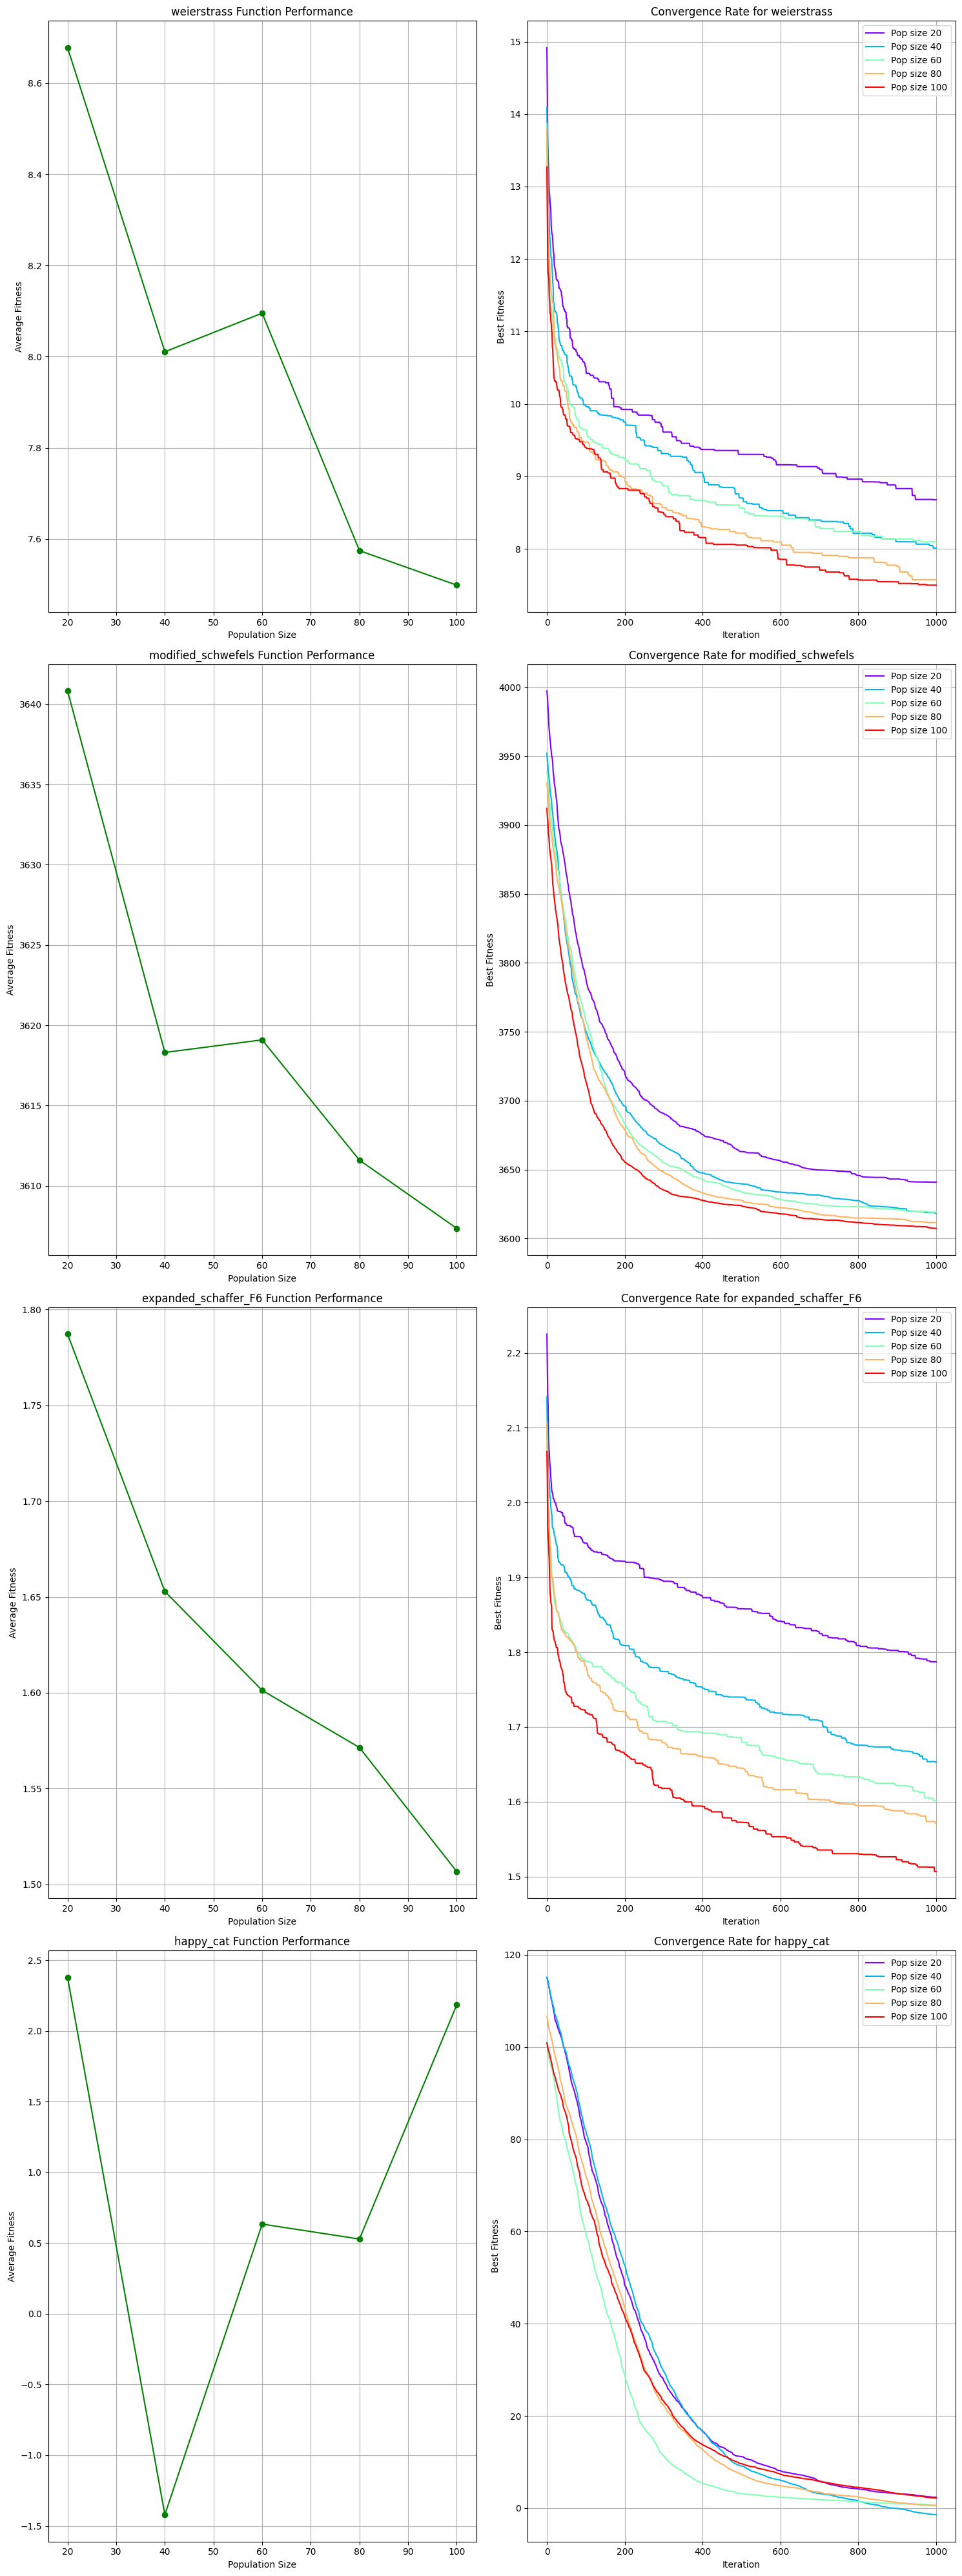

In [ ]:
results, convergence_rates,timings = run_benchmark_tests(benchmark_functions, population_sizes, num_runs, max_iter)
print(f"Results for benchmark functions: {results}")
plot_results_and_convergence(results, convergence_rates, population_sizes)


In [ ]:

results, convergence_rates,timings = run_benchmark_tests(benchmark_functions, population_sizes, num_runs, max_iter)
print(f"Results for benchmark functions: {results}")
plot_results_and_convergence(results, convergence_rates, population_sizes)


Population Size: 20, Average Fitness for sphere: 61.66894929313386 in 42.76191020011902 seconds.

Population Size: 40, Average Fitness for sphere: 62.47563943771281 in 49.40024733543396 seconds.

Population Size: 60, Average Fitness for sphere: 130.7140745261748 in 73.97843050956726 seconds.

Population Size: 80, Average Fitness for sphere: 25.455702272358753 in 98.33096432685852 seconds.

Population Size: 100, Average Fitness for sphere: 31.06506800157641 in 123.43294167518616 seconds.

Population Size: 20, Average Fitness for rastrigin: 578.7980986841278 in 52.926711320877075 seconds.

Population Size: 40, Average Fitness for rastrigin: 266.78641672776297 in 101.59210872650146 seconds.

Population Size: 60, Average Fitness for rastrigin: 203.0992428982953 in 150.41425228118896 seconds.

Population Size: 80, Average Fitness for rastrigin: 744.3318771872972 in 207.65375351905823 seconds.

Population Size: 100, Average Fitness for rastrigin: 420.61030518458404 in 260.62078738212585 seco

In [ ]:
#Results for benchmark functions: {'sphere': [0.0029404315460188003, 0.001633927696705243, 0.0006856651980890811, 0.0005059596427182986, 0.00043009213807899553], 'rastrigin': [0.47159492862143254, 0.2758627220061175, 0.3203935973597282, 0.278407179007942, 0.08483170188624597], 'ackley': [0.15645319680107864, 0.10243858539962392, 0.07746856956909447, 0.08080526985052358, 0.06796946931526962], 'rosenbrock': [0.03512551888785522, 0.027976627841144873, 0.008174537542757524, 0.008102307961580705, 0.009955241954291918], 'griewank': [0.0011178899695237887, 0.0008533741318757615, 0.00030803087418111995, 0.0002409565768989097, 0.00023755779542881106], 'levy': [0.0006268616625428975, 0.00026449044063668923, 0.00011224192589938337, 0.0002161888999820324, 0.00010465041073704211], 'schwefel': [136.16858578350383, -342.4840809941817, -521.1236442712893, -323.27065751364825, -5500.2713049875265], 'de_jong': [0.0018234671510288215, 0.0004706118182279709, 0.0009591643151395313, 0.00048852607438743, 0.00022997731683606267], 'himmelblau': [0.015729540082115107, 0.01534923153754492, 0.014126664534414671, 0.005126797300210033, 0.0027768948438103257], 'easom': [-0.9955944473184243, -0.9950157590533888, -0.9989333756940892, -0.9987014883370764, -0.9987215837632928], 'michalewicz': [-1.9108830104324237, -1.9373456968594696, -1.9496134336661926, -1.937612387258581, -1.9465567253781297], 'beale': [0.008438263717538938, 0.002747980641013003, 0.0008995457069473876, 0.0010390911477729692, 0.0010406357786853203], 'goldstein_price': [3.622201240005746, 3.329673672433917, 3.411691550169828, 3.173180151525566, 3.1054296985672525], 'booth': [0.011917604152264533, 0.003689236079215312, 0.0026402280639380117, 0.0017343331353639427, 0.0014779817363986003], 'bukin': [1.5647744618729575, 1.110659651944115, 0.6354924750324301, 0.6120646757593672, 0.8890351879799528], 'matyas': [0.0004939300449745456, 5.609195625945464e-05, 8.968595174059563e-05, 6.164254406891975e-05, 4.149370358683864e-05], 'three_hump_camel': [0.0018482404457652937, 0.0020735463277446733, 0.0008770671881608869, 0.0010707279795938304, 0.000781216135986637], 'six_hump_camel': [-1.0275710788062242, -1.0271814858500363, -1.0285563467915952, -1.029958290857707, -1.0302949536398323], 'cross_in_tray': [-4664158502541703.0, -inf, -inf, -inf, -inf], 'eggholder': [-1048.949403709165, -824.0751351557046, -1097.6384663017434, -2459.615481984533, -1853.756434638509]}

In [29]:
#Function to plot the initial configuration of the TSP
def plot_initial_tsp_graph(cities):
    plt.figure(figsize=(10, 6))
    plt.scatter(cities[:, 0], cities[:, 1], color='red')
    plt.title('Initial Traveling Salesman Problem Graph')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

#Function to generate a random path
def random_path(num_cities):
    return np.random.permutation(num_cities)

#Funtion to generate a random path but with same start city to reduce randomness for different population sizes
def random_path_with_fixed_start(num_cities, start_city=0): #replace random_path with this function to implement it
    path = np.random.permutation(num_cities)
    start_index = np.where(path == start_city)[0][0]
    path[0], path[start_index] = path[start_index], path[0]
    return path

#Function to calculate total distance of a path
def total_distance(cities, path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[(i + 1) % len(path)]]) for i in range(len(path)))

#Levy flight function (Mantegna's Algorithm) for TSP
def levy_flight(beta, size=1):
    #Calculation of sigma (standard deviation)
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    sigma_v = 1

    u = np.random.normal(0, sigma_u, size)
    v = np.random.normal(0, sigma_v, size)
    step = u / np.fabs(v) ** (1 / beta)

    return step

#Cuckoo Search for TSP with simple Lévy flights
def cuckoo_search_tsp(cities, nests, fitness, n, max_iter, pa, beta=1.5):
    num_cities = len(cities)

    #Subsample nests for the current population size
    current_nests = nests[:n]
    current_fitness = fitness[:n]

    #Find the best solution in the initial population
    best_nest_idx = current_fitness.argmin()
    best_nest = current_nests[best_nest_idx]
    best_fitness = current_fitness[best_nest_idx]

    for iter in range(max_iter):
        for i in range(n):
            new_nest = np.copy(nests[i])

            #Get a step size from Lévy flight
            step_size = levy_flight(beta)
            #Apply the step to a randomly chosen subset of the tour
            city_indices = np.sort(np.random.choice(num_cities, 2, replace=False))
            start, end = city_indices
            if (start + step_size) % num_cities < end:
                new_nest[start:end] = np.roll(new_nest[start:end], int(step_size))
            else:
                new_nest[end:(start + int(step_size)) % num_cities] = np.roll(new_nest[end:(start + int(step_size)) % num_cities], int(step_size))

            #Calculate the fitness of the new solution
            fnew = total_distance(cities, new_nest)

            #Greedily select the better solution
            if fnew < fitness[i]:
                nests[i] = new_nest
                fitness[i] = fnew

                #Update the best solution found so far
                if fnew < best_fitness:
                    best_nest = new_nest
                    best_fitness = fnew

        #Abandon a fraction (pa) of the worst nests
        for i in range(n):
            if np.random.rand() < pa:
                nests[i] = random_path(num_cities)  #Generate a new random solution for a nest
                fitness[i] = total_distance(cities, nests[i])  #Recalculate its fitness

    return best_nest, best_fitness


#Function to run the Cuckoo Search algorithm for different population sizes
def run_cuckoo_search(cities, population_sizes, max_iter, max_nests=100, num_runs=1):
    num_cities = len(cities)

    #Generate a large set of initial nests and fitnesses
    all_nests = [random_path(num_cities) for _ in range(max_nests)] #Initialize nests with random tours
    all_fitness = np.array([total_distance(cities, nest) for nest in all_nests])  #Fitness of each nest

    avg_distances = []
    best_distances = []
    best_paths = []
    #For each population size
    for n in population_sizes:
        distances = []
        for _ in range(num_runs):
            # Random values for pa and beta within their usual usage range
            pa = np.random.uniform(0.1, 0.25)
            beta = np.random.uniform(1.5, 2.0)
            best_path, best_fitness = cuckoo_search_tsp(cities, all_nests, all_fitness, n, max_iter, pa, beta) #Best path for each population
            distances.append(best_fitness)
            best_distances.append(best_fitness)
            best_paths.append(best_path)

        avg_distance = sum(distances) / len(distances)
        avg_distances.append(avg_distance)

        print(f"Population size: {n}, Average Fitness: {avg_distance} and Best Fitness: {best_fitness} for {n}")

    return best_distances, best_paths, avg_distances

#Function to find the best population size
def test_population_sizes(population_size, best_distances, avg_distances):
    best_index = np.argmin(avg_distances)
    best_population_size = population_sizes[best_index]
    best_distance = best_distances[best_index]
    avg_distance = avg_distances[best_index]
    return best_population_size, best_distance, avg_distance

#Function to plot the effect of population size on the Cuckoo Search performance
def test_population_sizes_plot(population_sizes, best_distances):
    plt.figure(figsize=(10, 6))
    plt.plot(population_sizes, best_distances, marker='o')
    plt.title('Effect of Population Size on Cuckoo Search for TSP')
    plt.xlabel('Population Size')
    plt.ylabel('Average Distance Found')
    plt.grid(True)
    plt.show()

from matplotlib.cm import get_cmap

def plot_best_paths(cities, best_paths, best_index=None, plot_best_flag_only=True):
    num_paths = len(best_paths)
    #Generating a color map
    cmap = get_cmap('viridis', num_paths)

    #Filtering to only plot the best path if flag is set
    paths_to_plot = [best_paths[best_index]] if plot_best_flag_only and best_index is not None else best_paths

    for i, best_path in enumerate(paths_to_plot):
        plt.figure(figsize=(12, 8))
        plt.scatter(cities[:, 0], cities[:, 1], color='red', zorder=5)
        color = cmap(i)
        for j in range(len(best_path)):
            start_city = cities[best_path[j]]
            end_city = cities[best_path[(j + 1) % len(best_path)]]
            plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color=color, zorder=1)
            #Annotating the city with the order number if not plotting the best path only
            plt.annotate(f'{j}', (start_city[0], start_city[1]), textcoords="offset points", xytext=(0,10), ha='center', zorder=10)

        plt.title('Best Path Found by Cuckoo Search' if plot_best_flag_only else 'Best Paths Found by Cuckoo Search for Different Population Sizes')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()


In [23]:
num_cities = 100
max_iter = 1000
population_sizes = [20, 40, 60, 80, 100]  # Different population sizes to test
cities = np.random.rand(num_cities, 2)

In [24]:
#Function to run with default parameters
def run_tsp(num_cities=100, population_sizes=[20, 40, 80, 100], cities=[], max_iter=1000, num_runs=1):
  if len(cities)==0:
    cities = np.random.rand(num_cities, 2)

  #Plot the initial TSP graph
  plot_initial_tsp_graph(cities)

  #Run the Cuckoo Search algorithm for different population sizes
  best_distances, best_paths, avg_distances = run_cuckoo_search(cities, population_sizes, max_iter, max(population_sizes), num_runs)

  #Find the best population size based on the average best distances obtained
  best_population_size, best_distance, avg_distance = test_population_sizes(population_sizes, best_distances, avg_distances)
  print(f"The best population size is {best_population_size} with average distance: {avg_distances}.")

  #Plot the effect of population size on the Cuckoo Search performance
  test_population_sizes_plot(population_sizes, avg_distances)

  #Retrieve the best path for the best population size
  best_index = population_sizes.index(best_population_size)
  best_path = best_paths[best_index]

  #Space
  print("")

  #Plot best paths for each population size
  plot_best_paths(cities, best_paths, best_index)

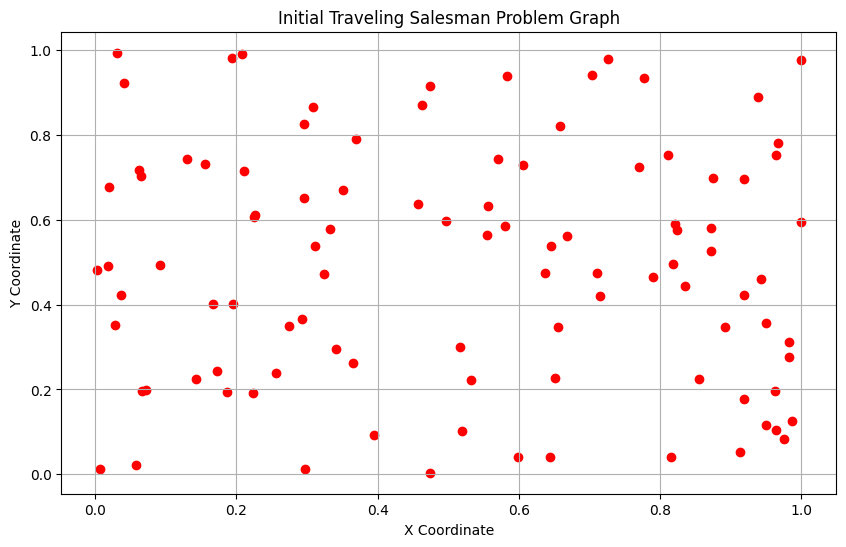

Population size: 20, Average Fitness: 46.989193363365835 and Best Fitness: 47.06775280748918 for 20
Population size: 40, Average Fitness: 46.52888345473594 and Best Fitness: 46.27855795081806 for 40
Population size: 60, Average Fitness: 46.16466376867875 and Best Fitness: 46.54358639067893 for 60
Population size: 80, Average Fitness: 45.7455705269535 and Best Fitness: 45.86417156975576 for 80
Population size: 100, Average Fitness: 46.079537080425844 and Best Fitness: 46.02760100478044 for 100
The best population size is 80 with average distance: [46.989193363365835, 46.52888345473594, 46.16466376867875, 45.7455705269535, 46.079537080425844].


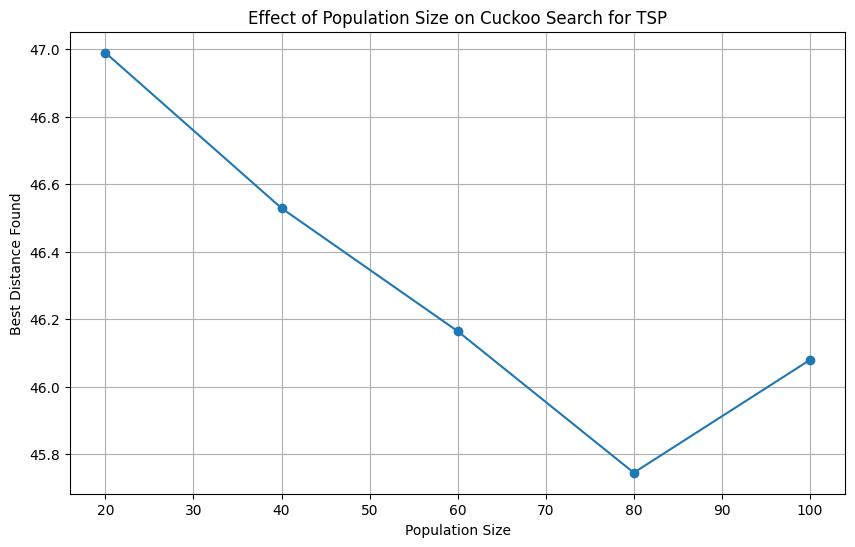

NameError: ignored

In [25]:
run_tsp(num_cities, population_sizes, cities, max_iter, num_runs=30)